# 如何利用學校的範例改成自己的
## 以 "06_TitanicPreprosess" 鐵達尼號預處理的那份檔案為例
概念: 我會寫，只是我不熟練，只是懶得自己寫<br>
所以，在這個快速的，比效率的時代，盡可能地不要重複造輪子

## 流程（以鐵達尼號預處理為例）
- 複製學校的範例程式碼
- 搞懂程式碼的意思，開始刪除你不想用的部分
- 加上你想要的部分，這部分也可以拿別人的程式碼來剪貼
- 以下是我改過的程式碼

人工智慧學校 朱建宇 座位 12樓B7 喜歡跟人討論 如有任何疑問，歡迎來找我

# 以下為我自己更改過的程式碼

In [1]:
# 載入套件 為方便解釋 把套件全部改位置
# data analysis and wrangling
# import pandas as pd
# import numpy as np
# import random as rnd

# visualization
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
import pandas as pd #利用pandas讀取資料 所以import
#acquire data
#載入兩筆資料 為了避免同學不會找檔案位置 所以我直接讀取網路上的資料
# train_df  = pd.read_csv('titanic/train.csv')
# test_df  = pd.read_csv('titanic/test.csv')
train_url = "https://storage.googleapis.com/kaggle_datasets/Titanic-Machine-Learning-from-Disaster/train.csv"
train_df = pd.read_csv(train_url)
# combine = [train_df, test_df]

In [3]:
# 看一下資料長啥樣 看完之後就不需要惹
# train_df.head()
# train_df.info()
# test_df.head()
# test_df.info()

#print column names
# print(train_df.columns)

#preview the data
# train_df.head()
# train_df.describe()
# train_df.describe(include=['O']) #string stype data

In [4]:
# 看一下生存率跟性別的關係 看完也不需要惹

# train_df[["Sex", "Survived"]].groupby(['Sex'], 
# as_index = False).mean().sort_values(by = "Survived", ascending = False)
# train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index = False).mean().sort_values(by = "Survived", ascending = False )

In [5]:
#載入 matplotlib.pyplot 畫個圖自爽一下
#看完之後也可以丟了

# import matplotlib.pyplot as plt

# axes1 = plt.subplot(1,2,1)
# axes1.hist(train_df.Age[train_df.Survived == 0].dropna(), bins = 20)
# axes1.set_title("survived = 0")

# axes2 = plt.subplot(1,2,2)
# axes2.set_ylim(0, 50)
# axes2.set_title("survived = 1")
# axes2.hist(train_df.Age[train_df.Survived == 1].dropna(), bins = 20)
# plt.show()

我們藉由上圖，我認為生存率跟年紀是有關係的

# 但是，到這邊為止，我發現test 資料裡面沒有生存率

### 因此，我要做一個 訓練測試分割(train_test_split)

In [7]:
#資料處理一
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

train, valid = train_test_split(train_df, test_size=0.3, random_state=123)

# 看一下切的狀況如何 沒看出什麼東西 但看出 "這個切" 是很ok的
# 看完後也不需要惹

# train_survived = train[train["Survived"] == 1]
# train_dead = train[train["Survived"] == 0]
# valid_survived = valid[valid["Survived"] == 1]
# valid_dead = valid[valid["Survived"] == 0]
# fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=True, sharex=True)
# axes[0].scatter(train_survived["Fare"], train_survived["Age"], color="green", alpha=0.5)
# axes[0].scatter(train_dead["Fare"], train_dead["Age"], color = "red", alpha=0.5)
# axes[1].scatter(valid_survived["Fare"], valid_survived["Age"], color="blue", alpha=0.5)
# axes[1].scatter(valid_dead["Fare"], valid_dead["Age"], color = "black", alpha=0.5)
# plt.show()

In [8]:
# 資料處理二 把沒有年紀的刪除 用票價跟年紀來訓練

import numpy as np

titanic_data = train_df

labeled_df = titanic_data[titanic_data["Age"].notna()]
train_df, validation_df = train_test_split(labeled_df, test_size=0.3, random_state=123)
X_train = train_df[["Fare", "Age"]].values
y_train = train_df["Survived"].values.reshape(-1, 1)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

logistic_clf = LogisticRegression()
sv_clf = SVC(gamma = 0.1)
X_train = train_df[["Fare", "Age"]].values
y_train = train_df["Survived"].values
logistic_clf.fit(X_train, y_train)
sv_clf.fit(X_train, y_train)
X_valid = validation_df[["Fare", "Age"]].values
y_valid = validation_df["Survived"].values
y_pred = logistic_clf.predict(X_valid)
# y_pred[:5]
# y_valid[:5]

/Users/vga53327/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_valid, y_pred)
conf_mat

array([[121,  10],
       [ 63,  21]])

# 得到混淆矩陣
$$
\left[
 \begin{matrix}
   121 & 10\\
   63 & 21
  \end{matrix} 
\right]
$$

### 命中率大約0.66<br> 不太準，但比瞎猜要好了

### 改善方式有很多種，例如我把沒有年紀的資料都忽略了，所以可以考慮從這個方面去改善看看

In [11]:
# 看一下分佈，沒裝套件的請執行一下安裝指令
# !pip install mlxtend

(0, 50)

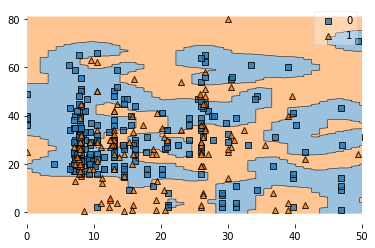

In [12]:
# 訓練樣本生存分佈 橫軸是票價 縱軸是年紀
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, clf = sv_clf, res = 0.1)
plt.xlim((0, 50))

(0, 50)

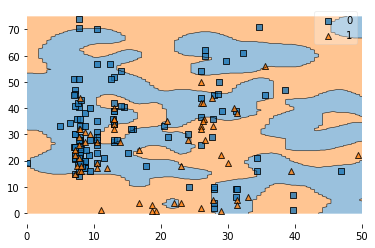

In [13]:
# 測試樣本生存分佈
plot_decision_regions(X_valid, y_valid, clf = sv_clf, res = 0.1)
plt.xlim((0, 50))

# 機器學習常用套路
```python
from sklearn.model_selection import train_test_split #切分訓練測試樣本
from sklearn.svm import SVC #演算法
from sklearn.metrics import confusion_matrix #看混淆矩陣
```
### 實作最簡單的方式就是搞懂別人在寫什麼<br>然後東抄一點，西抄一點<br>祝大家一切學習順利